# Indonesian Abusive and Hate Speech Twitter Text Analysis

#### Background

Hate speech is a form of expression that is done to eliminate hatred and commit acts of violence and against a person or group of people for various reasons. Cases of hate speech are very often found on social media, one of which is on Twitter.

In a report entitled 'Digital Civility Index (DCI)' published by Microsoft in 2020, Indonesia ranks lowest in Southeast Asia for the level of decency or ranks 29th out of 32 countries surveyed. Meanwhile, according to POLRI data, from April 2020 to July 2021 there were 937 reported cases with the highest number namely provocative cases, hateful content and hatred.

Using data consisting of 13,169 tweets in Indonesian, I will analyze whether the tweets contain hate speech or abusive words.

#### Objectives

1. How many total or comparison of tweets that contain abusive words and hate speech from all the existing tweets?
2. To whom are the hate speech tweets directed?
3. What topics are most frequently discussed and what is the level of hate speech in tweets?

## 1. Load Libraries and Dataset

In [1]:
# Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Take a look peak of data

data = pd.read_csv('data.csv', encoding='latin-1')
data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# General info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [4]:
# Missing value check

data.isna().sum() / len(data)

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [5]:
# Duplicated data check

data.duplicated().sum()

125

- The dataset consists of 13,169 rows and 13 columns which contain tweets in Indonesian and their classifications
- There are no missing values in the dataset
- There are 125 duplicated data in this dataset. Duplicate data needs to removed

In [6]:
# Remove duplicated data

data = data.drop_duplicates()

# Sanity check

data.duplicated().sum()

0

## 2. Exploratory Data Analysis (EDA)

### 2.1 Tweet Contains Hate Speech and Abusive Words

In [7]:
# Create new column for tweet type

def tweet(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Hate Speech'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'None'

data['Type'] = data.apply(tweet, axis=1)

In [8]:
# Take a look at dataset

data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None


In [9]:
# Tweet type classification

data['Type'].value_counts()

None                     5783
Hate Speech & Abusive    3262
Hate Speech              2256
Abusive                  1743
Name: Type, dtype: int64

<AxesSubplot:ylabel='Type'>

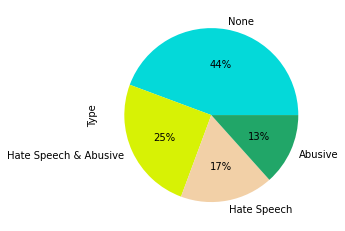

In [10]:
# Visualization

data['Type'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#04D9D9','#D7F205','#F2D0A7','#21A668'])

There are 56% negative tweets with compositions 13% containing abusive words, 17% hate speech, and 25% containing both.

### 2.2 Target of the Intended Hate Speech Tweet

In [11]:
# Create new column for negative tweet target

def target(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 1:
        return 'Both'
    elif x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individual'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Group'
    else:
        return 'None'

data['Target'] = data.apply(target, axis=1)

In [12]:
# Take a look at dataset

data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None,None


In [13]:
# Tweet target classification

filter = data['Target'] == 'None'
data[~filter]['Target'].value_counts()

Individual    3540
Group         1978
Name: Target, dtype: int64

<AxesSubplot:ylabel='Target'>

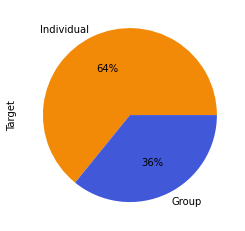

In [14]:
# Visualization

data[~filter]['Target'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#F28907','#4158D9'])

Majority of tweets with hate speech are directed at certain individuals with a ratio 64%.

### 2.3 Topic and Level of Negative Tweets That Most Discussed in the Tweet

In [15]:
# Create new dataframe for hate speech tweet level

df_level = data[(data['HS_Weak'] == 1) | (data['HS_Moderate']==1) | (data['HS_Strong']==1)].reset_index()

In [16]:
# Create new column negative tweet level

def level(x):
    if x['HS_Weak'] == 1:
        return 'Weak'
    elif x['HS_Moderate'] == 1:
        return 'Moderate'
    elif x['HS_Strong'] == 1:
        return 'Strong'
    else:
        return 'None'
    
df_level['Level'] = df_level.apply(level, axis = 1)

In [17]:
# Select interesting column

df_level = pd.DataFrame(df_level, columns=['index', 'Level'])

# Take a look at dataframe

df_level.head()

,index,Level
0,0,Weak
1,4,Moderate
2,5,Moderate
3,10,Weak
4,11,Weak


In [18]:
# Create new dataframe for hate speech tweet topics

df_topic = data[data['Target'] != 'None'].reset_index()

In [19]:
# Create new column negative tweet topics

def HStopic(x):
    if x['HS_Religion'] == 1:
        return 'Religion'
    elif x['HS_Race'] == 1:
        return 'Race'
    elif x['HS_Physical'] == 1:
        return 'Physical'
    elif x['HS_Gender'] == 1:
        return 'Gender' 
    else:
        return 'Other'
    
df_topic['Topic'] = df_topic.apply(HStopic, axis = 1)

In [20]:
# Select interesting column

df_topic = pd.DataFrame(df_topic, columns=['index', 'Topic'])

# Take a look at dataframe

df_topic.head()

,index,Topic
0,0,Other
1,4,Religion
2,5,Other
3,10,Other
4,11,Gender


In [21]:
# Join df_level and df_topic

df = pd.merge(df_topic, df_level, on='index').drop(['index'], axis=1)
df.head()

,Topic,Level
0,Other,Weak
1,Religion,Moderate
2,Other,Moderate
3,Other,Weak
4,Gender,Weak


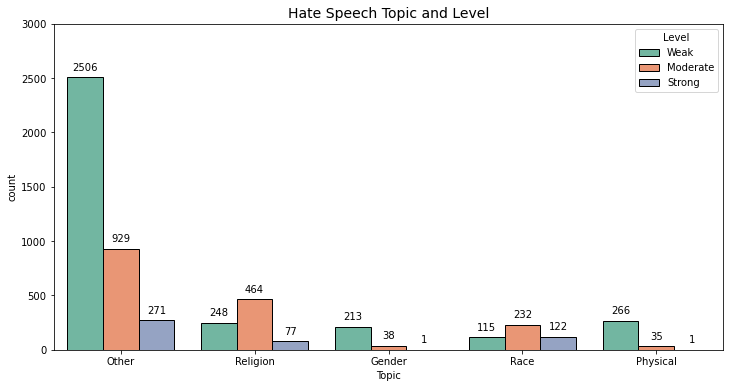

In [22]:
#Visualization

plt.figure(figsize=(12, 6))

plots = sns.countplot(x='Topic',hue='Level',data=df, palette='Set2', edgecolor='black')

for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 10),
                   textcoords='offset points')

plt.ylim(0,3000)
plt.title('Hate Speech Topic and Level',fontsize=14)
plt.show()

Topics of hate speech that are often discussed are general topic (Other), followed by negative tweets on the topic of religion. Likewise, from the level of hate speech discussed by the majority on general topics and followed by religion topic (Other).

In [23]:
# Tweet with HS_Weak in HS_Other example

print('Weak Hate Speech in Other topic example: {}'.format(data[(data['HS_Weak'] == 1) & (data['HS_Other']==1)]['Tweet'][0]))

Weak Hate Speech in Other topic example: - disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'


In [24]:
# Tweet with HS_Moderate in HS_Other example

print('Moderate Hate Speech in Other topic example: {}'.format(data[(data['HS_Moderate'] == 1) & 
                                                                    (data['HS_Other']==1)]['Tweet'][35]))

Moderate Hate Speech in Other topic example: Pegawai Guardian training lagi kek Mentang2 gue kek gembel cuman kaos sama Flat shoes nanya dijutekin bangsad emang males belinya juga kabur gua ke matahari'


In [25]:
# Tweet with HS_Strong in HS_Other example

print('Strong Hate Speech in Other topic example: {}'.format(data[(data['HS_Strong'] == 1) & 
                                                                  (data['HS_Other']==1)]['Tweet'][6590]))

Strong Hate Speech in Other topic example: Yup... Negara ini sangat tak pantas dipimpin seorang yg tak faham mengelola Negara dgn benar lengserkan jokowi


## 3. Conclusions

1. There are 56% negative tweets with compositions 13% containing abusive words, 17% hate speech, and 25% containing both.
2. Majority of tweets with hate speech are directed at certain individuals with a ratio 64%.
3. Topics of hate speech that are often discussed are general topic (Other), followed by negative tweets on the topic of religion. Likewise, from the level of hate speech discussed by the majority on general topics and followed by religion topic (Other).